In [1]:
!pip install pandas-datareader
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd 
import requests
import matplotlib.pyplot as plt
import xlsxwriter
import math
from pandas_datareader import data as pdr
from datetime import datetime
import os
import yfinance as yf
yf.pdr_override()

In [3]:
nse200 = pd.read_csv('ind_nifty200list.csv')
for i in range(len(nse200)):
    nse200['Symbol'][i] = nse200['Symbol'][i] + '.NS'
    
list_of_stocks = pd.DataFrame(nse200['Symbol'])
list_of_stocks


,Symbol
0,ACC.NS
1,AUBANK.NS
2,AARTIIND.NS
3,ADANIENT.NS
4,ADANIGREEN.NS
...,...
195,VOLTAS.NS
196,WHIRLPOOL.NS
197,WIPRO.NS
198,YESBANK.NS


In [4]:
start = datetime(2018,11,5)
end = datetime(2022,2,1)

In [5]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [6]:
#This function returns a pd dataframe with all of the adjusted closing information
def get_historical_Data(tickers):
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=start, end=end).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    print(names)
    return data

ticks = nse200['Symbol'].tolist()
d = get_historical_Data(ticks)
print(d.shape)
d.tail()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,ACC.NS,AUBANK.NS,AARTIIND.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ATGL.NS,ADANITRANS.NS,ABCAPITAL.NS,ABFRL.NS,...,UBL.NS,MCDOWELL-N.NS,VBL.NS,VEDL.NS,IDEA.NS,VOLTAS.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-19,2231.800049,1264.150024,1072.300049,1849.300049,1938.449951,744.200012,1794.900024,2043.250000,129.899994,314.299988,...,1612.400024,923.549988,939.950012,324.600006,11.95,1254.949951,1830.099976,620.140381,13.80,317.549988
2022-01-20,2254.000000,1254.050049,1059.449951,1865.849976,1966.699951,738.000000,1803.699951,2039.750000,127.750000,310.399994,...,1602.300049,910.450012,939.900024,327.149994,12.05,1253.699951,1847.199951,614.200012,13.80,308.450012
2022-01-21,2215.750000,1256.699951,1019.950012,1828.349976,1934.550049,723.900024,1827.300049,2066.800049,123.300003,302.899994,...,1566.349976,899.299988,915.849976,323.299988,11.85,1192.250000,1832.500000,605.049988,13.75,289.350006
2022-01-24,2167.449951,1229.500000,982.400024,1715.800049,1837.849976,702.450012,1781.150024,2035.900024,114.900002,284.549988,...,1523.800049,855.349976,900.650024,312.100006,10.95,1187.449951,1798.699951,572.750000,13.45,268.100006
2022-01-25,2179.949951,1246.449951,981.799988,1741.400024,1929.000000,711.099976,1825.199951,1992.449951,117.699997,289.450012,...,1557.949951,874.950012,872.700012,318.049988,11.30,1190.900024,1780.300049,562.700012,13.60,288.799988


In [7]:
ticks

['ACC.NS',
 'AUBANK.NS',
 'AARTIIND.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ATGL.NS',
 'ADANITRANS.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'AJANTPHARM.NS',
 'APLLTD.NS',
 'ALKEM.NS',
 'AMARAJABAT.NS',
 'AMBUJACEM.NS',
 'APOLLOHOSP.NS',
 'APOLLOTYRE.NS',
 'ASHOKLEY.NS',
 'ASIANPAINT.NS',
 'ASTRAL.NS',
 'AUROPHARMA.NS',
 'DMART.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS',
 'BALKRISIND.NS',
 'BANDHANBNK.NS',
 'BANKBARODA.NS',
 'BANKINDIA.NS',
 'BATAINDIA.NS',
 'BERGEPAINT.NS',
 'BEL.NS',
 'BHARATFORG.NS',
 'BHEL.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BIOCON.NS',
 'BOSCHLTD.NS',
 'BRITANNIA.NS',
 'CADILAHC.NS',
 'CANBK.NS',
 'CASTROLIND.NS',
 'CHOLAFIN.NS',
 'CIPLA.NS',
 'CUB.NS',
 'COALINDIA.NS',
 'COFORGE.NS',
 'COLPAL.NS',
 'CONCOR.NS',
 'COROMANDEL.NS',
 'CROMPTON.NS',
 'CUMMINSIND.NS',
 'DLF.NS',
 'DABUR.NS',
 'DALBHARAT.NS',
 'DEEPAKNTR.NS',
 'DHANI.NS',
 'DIVISLAB.NS',
 'DIXON.NS',
 'LALPATHLAB.NS',
 'DRREDDY.NS',
 'EICHER

In [8]:
corr_df = d.corr()
corr_df


,ACC.NS,AUBANK.NS,AARTIIND.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ATGL.NS,ADANITRANS.NS,ABCAPITAL.NS,ABFRL.NS,...,UBL.NS,MCDOWELL-N.NS,VBL.NS,VEDL.NS,IDEA.NS,VOLTAS.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
ACC.NS,1.000000,0.819475,0.895470,0.926551,0.793673,0.913655,0.898282,0.904010,0.729692,0.553330,...,0.710139,0.709838,0.903539,0.923627,0.039508,0.923615,0.309046,0.958446,-0.342442,0.000113
AUBANK.NS,0.819475,1.000000,0.809971,0.827676,0.778210,0.835813,0.772282,0.778750,0.674891,0.553483,...,0.510829,0.583753,0.877827,0.753198,-0.199774,0.884017,0.572860,0.812876,-0.531172,-0.215564
AARTIIND.NS,0.895470,0.809971,1.000000,0.969245,0.891847,0.900265,0.946201,0.940783,0.539677,0.388814,...,0.501294,0.709489,0.960087,0.878165,-0.132403,0.929914,0.462481,0.951792,-0.580583,-0.267226
ADANIENT.NS,0.926551,0.827676,0.969245,1.000000,0.878719,0.952848,0.978730,0.968627,0.664916,0.479718,...,0.576550,0.702621,0.948509,0.934655,-0.040311,0.946232,0.386390,0.966359,-0.482776,-0.155962
ADANIGREEN.NS,0.793673,0.778210,0.891847,0.878719,1.000000,0.853523,0.854445,0.837676,0.488374,0.208342,...,0.284173,0.523534,0.881930,0.746005,-0.083789,0.902615,0.569278,0.869970,-0.638645,-0.367067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VOLTAS.NS,0.923615,0.884017,0.929914,0.946232,0.902615,0.937117,0.923960,0.932468,0.673226,0.514162,...,0.590780,0.713655,0.960270,0.893840,-0.071722,1.000000,0.519162,0.953356,-0.526564,-0.149326
WHIRLPOOL.NS,0.309046,0.572860,0.462481,0.386390,0.569278,0.395115,0.322047,0.337802,0.067611,-0.063467,...,-0.134758,0.176737,0.544263,0.170544,-0.565030,0.519162,1.000000,0.358846,-0.798513,-0.691479
WIPRO.NS,0.958446,0.812876,0.951792,0.966359,0.869970,0.927936,0.942889,0.943216,0.652573,0.479597,...,0.635172,0.712931,0.938476,0.935947,0.035734,0.953356,0.358846,1.000000,-0.429455,-0.086738
YESBANK.NS,-0.342442,-0.531172,-0.580583,-0.482776,-0.638645,-0.421766,-0.449060,-0.437570,0.048288,0.158025,...,0.203574,-0.260293,-0.599151,-0.224483,0.706900,-0.526564,-0.798513,-0.429455,1.000000,0.805733


In [9]:
corr_matrix = corr_df.to_numpy()
corr_matrix

array([[ 1.00000000e+00,  8.19475258e-01,  8.95470339e-01, ...,
         9.58445655e-01, -3.42441889e-01,  1.12773034e-04],
       [ 8.19475258e-01,  1.00000000e+00,  8.09970683e-01, ...,
         8.12876019e-01, -5.31171537e-01, -2.15563534e-01],
       [ 8.95470339e-01,  8.09970683e-01,  1.00000000e+00, ...,
         9.51791829e-01, -5.80582656e-01, -2.67225866e-01],
       ...,
       [ 9.58445655e-01,  8.12876019e-01,  9.51791829e-01, ...,
         1.00000000e+00, -4.29455300e-01, -8.67381339e-02],
       [-3.42441889e-01, -5.31171537e-01, -5.80582656e-01, ...,
        -4.29455300e-01,  1.00000000e+00,  8.05733394e-01],
       [ 1.12773034e-04, -2.15563534e-01, -2.67225866e-01, ...,
        -8.67381339e-02,  8.05733394e-01,  1.00000000e+00]])

In [10]:
threshold = 0.985

corr_pairs = []
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]):
        if corr_matrix[i,j] > threshold:
            corr_pairs.append([i,j])

print('Total number of correlation pairs = ',len(corr_pairs))


Total number of correlation pairs =  7


In [11]:
filtered_df = corr_df[(corr_df > threshold) & (corr_df !=1.000)]
filtered_df

,ACC.NS,AUBANK.NS,AARTIIND.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ATGL.NS,ADANITRANS.NS,ABCAPITAL.NS,ABFRL.NS,...,UBL.NS,MCDOWELL-N.NS,VBL.NS,VEDL.NS,IDEA.NS,VOLTAS.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
ACC.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUBANK.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AARTIIND.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADANIENT.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADANIGREEN.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VOLTAS.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WHIRLPOOL.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WIPRO.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YESBANK.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


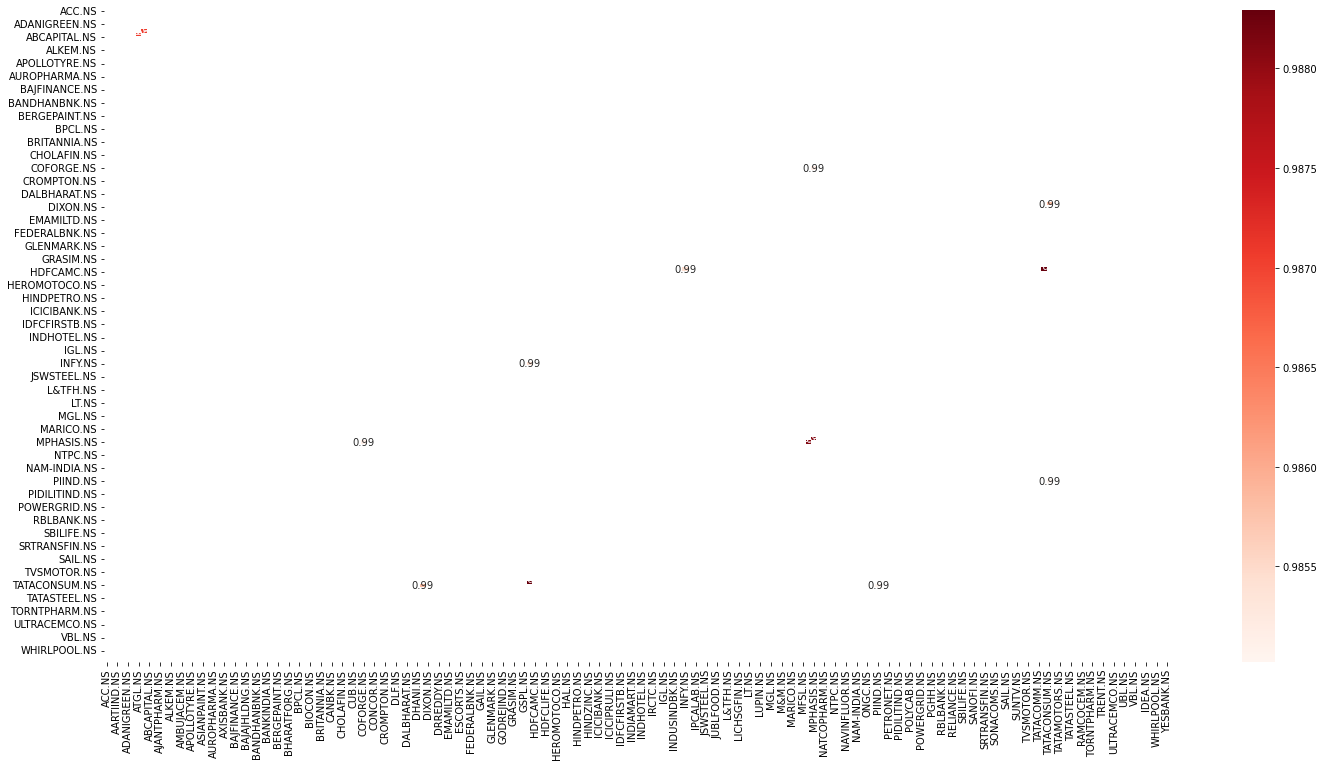

In [12]:
# filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
import seaborn as sn
plt.figure(figsize=(24,12))
sn.heatmap(filtered_df, annot=True, cmap="Reds")
plt.show()

In [13]:
sorted_mat = filtered_df.unstack().sort_values().drop_duplicates().dropna()
sorted_mat


PIIND.NS     TATACONSUM.NS    0.985020
COFORGE.NS   MPHASIS.NS       0.985145
HCLTECH.NS   INFY.NS          0.985434
DIVISLAB.NS  TATACONSUM.NS    0.985833
ATGL.NS      ADANITRANS.NS    0.987070
MINDTREE.NS  MPHASIS.NS       0.988115
HCLTECH.NS   TCS.NS           0.988295
dtype: float64

In [14]:
file_name = 'stocmks.xlsx'
  
# saving the excel
sorted_mat.to_csv(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [15]:
df2 = pd.read_csv('stocmks.xlsx')

In [16]:
my_columns = ("Stock_1","Stock_2","Corr")
df2.columns =  my_columns
df3  = df2.to_numpy()
print(df3)

[['PIIND.NS' 'TATACONSUM.NS' 0.985020215236625]
 ['COFORGE.NS' 'MPHASIS.NS' 0.985144726683932]
 ['HCLTECH.NS' 'INFY.NS' 0.985433818194047]
 ['DIVISLAB.NS' 'TATACONSUM.NS' 0.985833048448186]
 ['ATGL.NS' 'ADANITRANS.NS' 0.9870703599536396]
 ['MINDTREE.NS' 'MPHASIS.NS' 0.9881152422704912]
 ['HCLTECH.NS' 'TCS.NS' 0.9882950145331592]]


In [17]:
comp_set1 = pd.DataFrame(df2["Stock_1"])
comp_set1

,Stock_1
0,PIIND.NS
1,COFORGE.NS
2,HCLTECH.NS
3,DIVISLAB.NS
4,ATGL.NS
5,MINDTREE.NS
6,HCLTECH.NS


In [18]:
comp_set2 = pd.DataFrame(df2["Stock_2"])
comp_set2

,Stock_2
0,TATACONSUM.NS
1,MPHASIS.NS
2,INFY.NS
3,TATACONSUM.NS
4,ADANITRANS.NS
5,MPHASIS.NS
6,TCS.NS


In [19]:
lists1 = []
lists2 = []
for list in df3:
    lists1.append(list[0])
    lists2.append(list[1])
unique_stock_list = lists1[:]
[unique_stock_list.append(i) for i in lists2 if i not in lists1] 


[None, None, None, None, None, None, None]

In [20]:
df_final_stocks = pd.DataFrame(unique_stock_list)
df_final_stocks

,0
0,PIIND.NS
1,COFORGE.NS
2,HCLTECH.NS
3,DIVISLAB.NS
4,ATGL.NS
5,MINDTREE.NS
6,HCLTECH.NS
7,TATACONSUM.NS
8,MPHASIS.NS
9,INFY.NS


In [21]:
my_column1 = ["Symbl"]
df_final_stocks.columns = my_column1

In [22]:
df_final_stocks.to_csv('final_stocks_data.csv', index=False)


In [23]:
df_final_stocks

,Symbl
0,PIIND.NS
1,COFORGE.NS
2,HCLTECH.NS
3,DIVISLAB.NS
4,ATGL.NS
5,MINDTREE.NS
6,HCLTECH.NS
7,TATACONSUM.NS
8,MPHASIS.NS
9,INFY.NS
